In [1]:
import jax.numpy as jnp
import numpy as np

In [2]:
from jax import config

config.update("jax_enable_x64", True)

In [3]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science"])

In [4]:
from Free_Fermions_Model.hamiltonians import anderson_hamiltonian
from Free_Fermions_Model.spacetime_distribution import (
    spacetime_probability_distribution_finer_disorder_path,
    # spacetime_probability_distribution,
)

In [5]:
L = 101
J = 1
W = 2
seed = 696969

H = anderson_hamiltonian(L, J, W, seed)

In [6]:
Δt = 10
n = 100
generations = 1000

In [7]:
psi = jnp.zeros(L).at[(L - 1) // 2].set(1)

In [8]:
path = np.random.randint(1, L + 1, size=(generations,))

In [9]:
X = jnp.arange(0, (generations * (n + 1) + 1) / n, 1 / n)
X_old = jnp.arange(0, generations + 1, 1)
Y = jnp.arange(0, L, 1)
Y_ticks = jnp.arange(0, L, 10)

In [10]:
probabilities_matrix = [
    spacetime_probability_distribution_finer_disorder_path(
        H, psi, Δt, n, path, generations
    )
    for _ in range(10)
]

In [11]:
r1t = [
    [jnp.sum(prob * Y) for prob in probabilities]
    for probabilities in probabilities_matrix
]

In [12]:
colors = plt.cm.tab10(jnp.linspace(0, 1, 10))

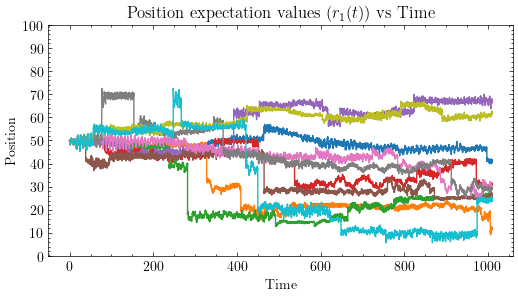

In [13]:
fig, ax = plt.subplots(figsize=(6, 3))
[ax.plot(X, r1t[i], c=colors[i]) for i in range(10)]
ax.set_yticks(Y_ticks)
ax.set_xlabel("Time")
ax.set_ylabel("Position")
ax.set_title("Position expectation values $(r_1(t))$ vs Time")
plt.savefig(
    "position_expectation_values_vs_time.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.1,
)
plt.show()

## Testing the Older method


probabilities*old_matrix = [
spacetime_probability_distribution(H, psi, Δt, n, generations) for * in range(10)
]


r1t_old = [
[jnp.sum(prob * Y) for prob in probabilities_old]
for probabilities_old in probabilities_old_matrix
]


fig, ax = plt.subplots()
[ax.plot(X_old, r1t_old[i]) for i in range(10)]
ax.set_yticks(Y_ticks)
ax.set_xlabel("Time")
ax.set_ylabel("Position")
plt.show()
